In [1]:
from pathlib import Path

from astropy.time import Time
from astropy.coordinates import AltAz, SkyCoord, EarthLocation
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from eigsep_observing import io
import eigsep_data as ed

%matplotlib widget

In [16]:
DATA_DIR = Path("/home/christian/Documents/research/eigsep/data-analysis/data/deployment4/corr_data/")
data = ed.EigsepData.from_path(DATA_DIR, start_time="20250719_100000", end_time="20250719_235959")

In [17]:
end_time = "20250719_235959"
end_dt = datetime.strptime(end_time, "%Y%m%d_%H%M%S")
end_dt

datetime.datetime(2025, 7, 19, 23, 59, 59)

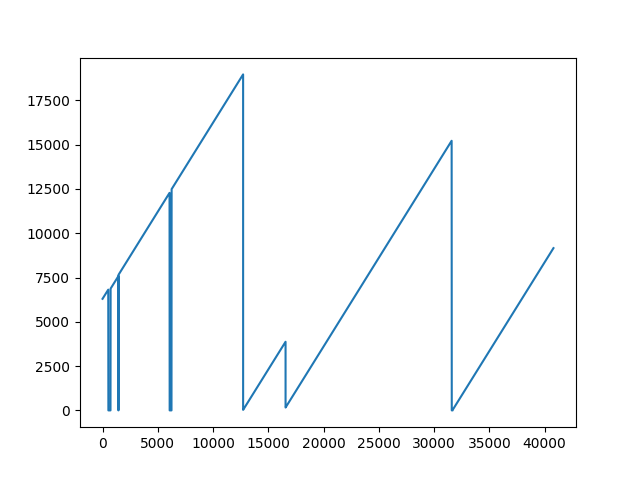

In [18]:
plt.figure()
plt.plot(data.acc_cnt)
plt.show()

In [19]:
data = data.slice(7500, 12500)

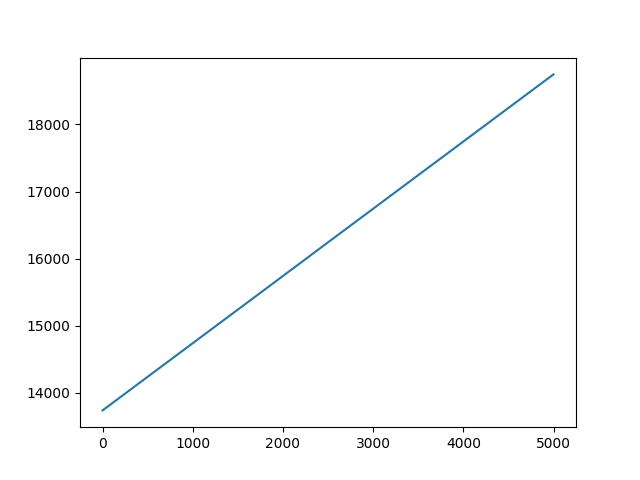

In [20]:
plt.figure()
plt.plot(data.acc_cnt)
plt.show()

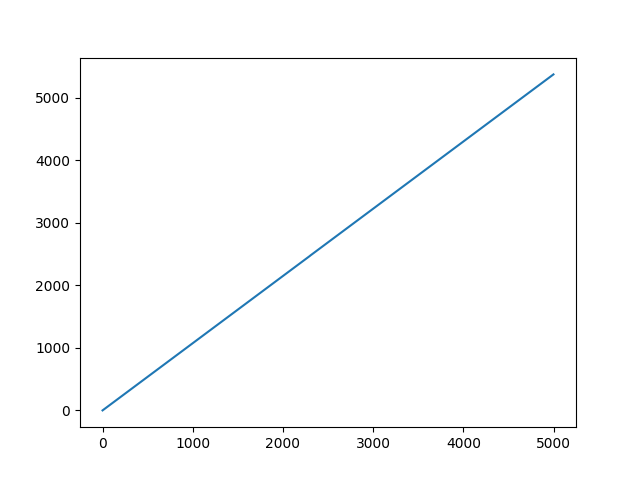

In [21]:
plt.figure()
plt.plot(data.times - data.times[0])
plt.show()

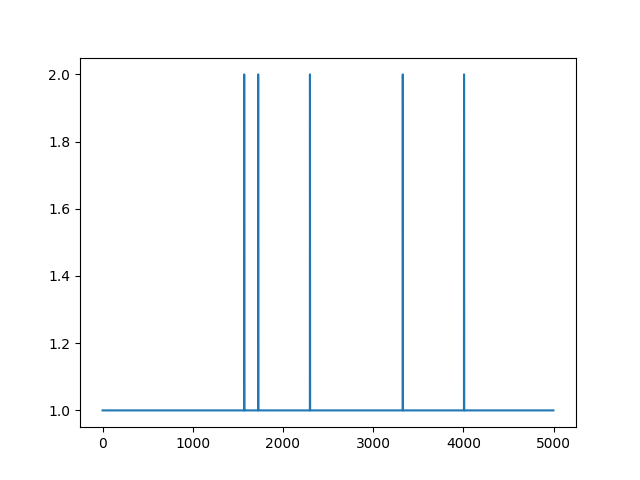

In [22]:
plt.figure()
plt.plot(np.diff(data.acc_cnt))
plt.show()

In [23]:
d2 = data.data["2"]
print(d2.shape)

(5000, 1024)


/tmp/ipykernel_5830/3117910910.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(d2), aspect="auto", interpolation="none", cmap="plasma", vmin=3, vmax=6)
/tmp/ipykernel_5830/3117910910.py:2: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(d2), aspect="auto", interpolation="none", cmap="plasma", vmin=3, vmax=6)


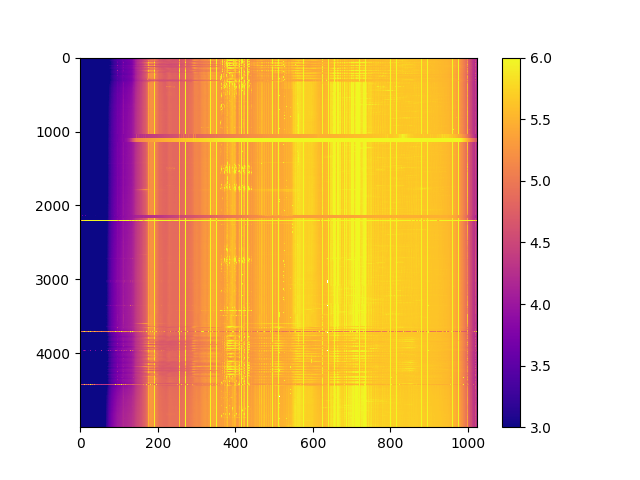

In [24]:
plt.figure()
plt.imshow(np.log10(d2), aspect="auto", interpolation="none", cmap="plasma", vmin=3, vmax=6)
plt.colorbar()
plt.show()

In [25]:
print(datetime.fromtimestamp(data.times[0]))
print(datetime.fromtimestamp(data.times[-1]))

2025-07-19 13:12:49.941702
2025-07-19 14:42:22.945790


In [27]:
if False:
    np.savez("data_july19_clean.npz", data=d2, acc_cnt=data.acc_cnt, times=data.times, freq=np.array(data.freq))

## Transmitter

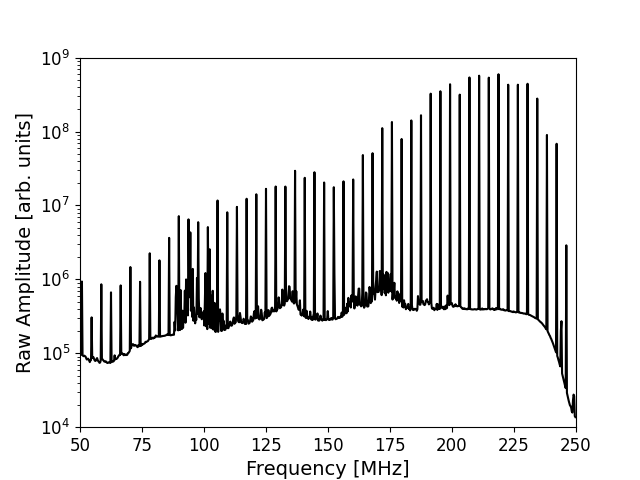

In [8]:
plt.figure()
plt.plot(data.freq, d2[0].T, c="k")
plt.yscale("log")
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Raw Amplitude [arb. units]", fontsize=14)
plt.gca().tick_params(axis='both', labelsize=12)
plt.xlim(50, 250)
plt.ylim(1e4, 1e9)
plt.show()

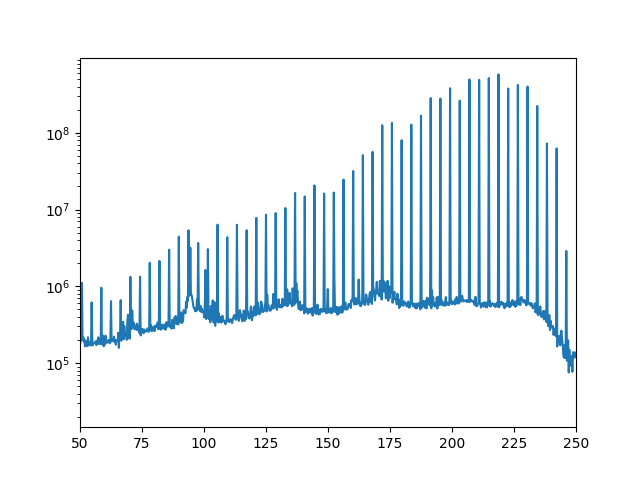

In [9]:
plt.figure()
plt.plot(data.freq, np.mean(d2, axis=0))
plt.yscale("log")
plt.xlim(50, 250)
plt.show()